ЗАДАНИЕ

1.Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: 
колонки из самих файлов (product_id, quantity), а также имя пользователя (name), 
и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

2.Выясните, какой пользователь купил больше всего товаров. 
#Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

3.Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
#Сколько было продано единиц товара с product_id==56?

4.Визуализируйте продажи по дням.

5.Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
#Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.DataFrame()
for a in os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-tulnikov-27/shared/homeworks/python_ds_miniprojects/4/data/'):
    for b in os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-tulnikov-27/shared/homeworks/python_ds_miniprojects/4/data/' + a):
        for c in os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-tulnikov-27/shared/homeworks/python_ds_miniprojects/4/data/' + a +'/' + b):
            tmp = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-tulnikov-27/shared/homeworks/python_ds_miniprojects/4/data/' + a + '/' + b + '/' + c, index_col=0)
            date = a.split('/')[-1]
            tmp['date'] = date
            name = b.split('/')[-1]
            tmp['name'] = name
            df = pd.concat([df, tmp])
                    

In [3]:
df

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
0,18,4,2020-12-07,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov
0,95,2,2020-12-07,Vasiliy_Ivanov
1,83,3,2020-12-07,Vasiliy_Ivanov


In [4]:
df.quantity.sum()

480

In [5]:
df.groupby('name', as_index=False) \
.agg({'quantity': 'sum'}) \
.sort_values('quantity', ascending=False).head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [6]:
df.head()

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov


In [7]:
top_10_product_id = df.groupby('product_id', as_index=False) \
.agg({'quantity': 'sum'}) \
.sort_values('quantity', ascending=False).head(10)

In [8]:
top_10_product_id

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


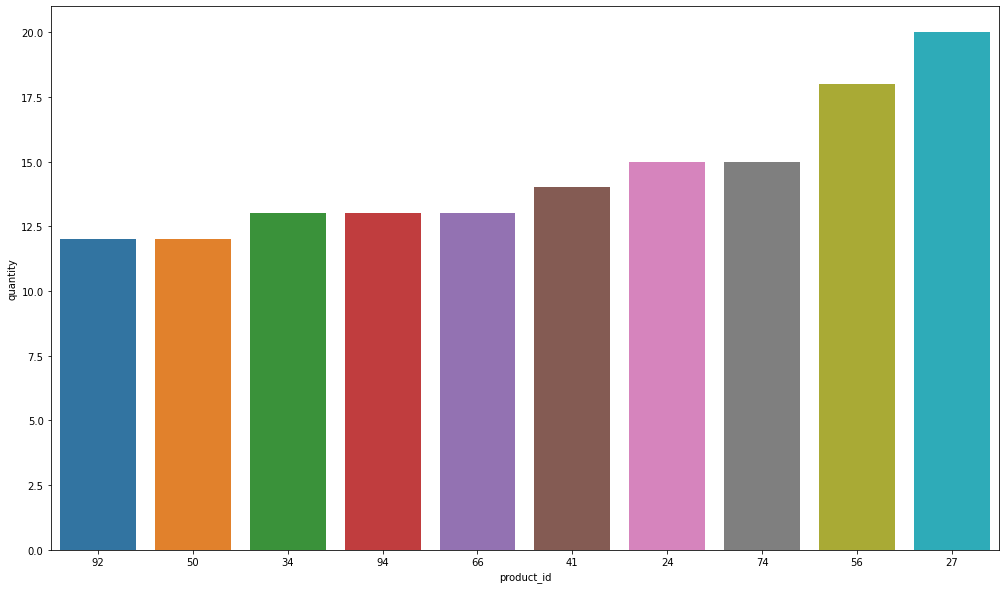

In [9]:
fig, ax = plt.subplots(figsize=(17,10))
sns.barplot(x = 'product_id', y = 'quantity', data = top_10_product_id,
           order = top_10_product_id.sort_values('quantity').product_id, ax=ax)

In [10]:
date_in_quantity =  df.groupby('date', as_index=False) \
.agg({'quantity': 'sum'}) \
.sort_values('date')

In [11]:
date_in_quantity

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


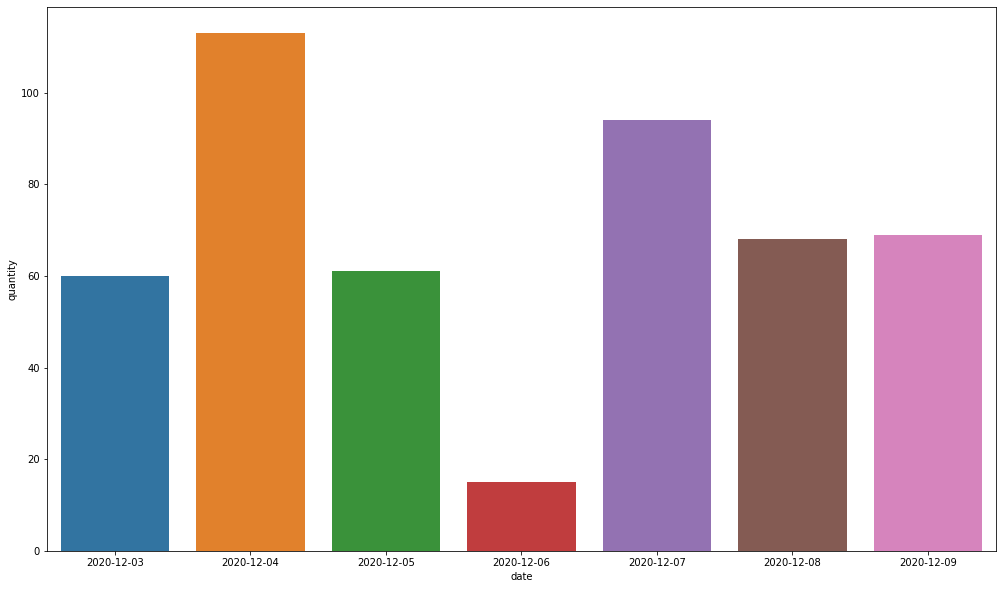

In [12]:
fig, ax = plt.subplots(figsize=(17,10))
sns.barplot(x = 'date', y = 'quantity', data = date_in_quantity)

In [13]:
df.head()

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov


In [14]:
same_product = df.groupby(['name', 'product_id']).date.nunique().sort_values(ascending=False)

In [15]:
same_product.loc[same_product >1]

name          product_id
Anton_Ivanov  15            2
Petr_Fedorov  94            2
Name: date, dtype: int64